# Problema 1: Integração

Para efetuar cálculos de campo elétrico na proximidade de fontes eletromagnéticas, utiliza-se integrais com a seguinte forma:
\[
S(x) = \int_0^x \sin(t^2) \, dt
\]
Considerando regras compostas com um número de intervalos \( n = \frac{x}{h} \) para diferentes passos de integração \( h \in H \), onde \( H = \{10^{-5}, 10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}, 1\} \), a integral utilizando:

\begin{itemize}
    \item Regra dos retângulos.
    \item Regra dos trapézios.
    \item Regra de Simpson.
\end{itemize}

Considere \( x = 20 \). Apresente em uma tabela as soluções utilizando os três métodos para cada um dos passos \( h \).

In [4]:
import numpy as np

# Definindo a função a ser integrada
def f(t):
    return np.sin(t**2)

# Regra dos Retângulos
def rectangle_rule(a, b, h):
    n = int((b - a) / h)
    integral = 0
    for i in range(n):
        x_i = a + i * h
        integral += f(x_i)
    return integral * h

# Regra dos Trapézios
def trapezoidal_rule(a, b, h):
    n = int((b - a) / h)
    integral = (f(a) + f(b)) / 2
    for i in range(1, n):
        x_i = a + i * h
        integral += f(x_i)
    return integral * h

# Regra de Simpson
def simpson_rule(a, b, h):
    n = int((b - a) / h)
    if n % 2 == 1:
        n += 1  # Simpson's rule requires an even number of intervals
    integral = f(a) + f(b)
    for i in range(1, n, 2):
        x_i = a + i * h
        integral += 4 * f(x_i)
    for i in range(2, n-1, 2):
        x_i = a + i * h
        integral += 2 * f(x_i)
    return integral * h / 3

# Intervalo de integração e passos
a = 0
b = 20
h_values = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1]

# Calculando integrais para diferentes valores de h
results = []
for h in h_values:
    rect_result = rectangle_rule(a, b, h)
    trap_result = trapezoidal_rule(a, b, h)
    simp_result = simpson_rule(a, b, h)
    results.append((h, rect_result, trap_result, simp_result))

# Exibindo resultados em uma tabela
print(f"{'h':<10} {'Retângulos':<15} {'Trapézios':<15} {'Simpson':<15}")
for result in results:
    print(f"{result[0]:<10} {result[1]:<15.8f} {result[2]:<15.8f} {result[3]:<15.8f}")

h          Retângulos      Trapézios       Simpson        
1e-05      0.63982877      0.63982451      0.63981601     
0.0001     0.63985853      0.63981599      0.63981601     
0.001      0.64023971      0.63981426      0.63981601     
0.01       0.64389503      0.63964044      0.63981792     
0.1        0.65706598      0.61452001      1.06117766     
1          -3.32040597     -3.74586565     -2.99245505    


\section*{Problema 2: Equação de Calor (Simulação de EDO)}

O problema de transmissão de calor descrito no Trabalho 1 é caracterizado por uma equação diferencial parcial, com uma descrição para casos onde o tempo, além do espaço, é considerado. O fenômeno é expresso da seguinte forma:

\[
\frac{\partial T}{\partial t} = k \frac{\partial^2 T(x, t)}{\partial x^2} - q(x, t)
\]

Essa equação descreve os valores de temperatura \( T \) ao longo do tempo e no espaço segundo um eixo unidimensional onde \( x \in (0, 1) \). Para fins dessa questão, o fluxo de calor exógeno é considerado nulo, ou seja \( q(x, t) = 0, \forall x, t \).

\begin{figure}[H]
    \centering
    \includegraphics[width=1\linewidth]{images/barra.png}
\end{figure}

Para resolver uma EDP, primeiramente é preciso conhecer suas condições de contorno. Para esse caso, elas são definidas \( \forall t \) como:
\[
\begin{cases}
    T(0, t) = T_{\text{begin}} \\
    T(1, t) = T_{\text{end}}
\end{cases}
\]

No caso onde a EDP também depende do tempo, é preciso conhecer as condições iniciais do sistema no tempo. Nesse caso, considere a seguinte condição inicial \( \forall x \in (0, 1) \):
\[
T(x, 0) = T_0
\]
ou seja, a barra começará aquecida na temperatura \( T_0 \) ao longo de todo o seu comprimento.

Um método para resolver EDPs transientes computacionalmente é reduzi-las para a forma de Equações Diferenciais Ordinárias (EDOs). Para isso, utilizamos Diferenças Finitas para efetuar essa transformação.

Efetuando a aproximação, a representação por EDOs do sistema possui a seguinte forma:
\[
\dot{T} = \frac{k}{h^2}(D^2 T + BC)
\]

onde \( D^2 \), \( T \) e \( BC \) são matrizes e vetores de dimensões adequadas definidos abaixo. O parâmetro \( h \) é o espaçamento dos pontos de interesse, sendo os mesmos definidos da seguinte forma:
\[
x_{i+1} = x_i + h
\]

A matriz \( T \) é organizada de tal forma que o elemento \( i \) corresponde a \( T(x_i) \), obtendo:
\[
T = \begin{pmatrix} T_1 \\ T_2 \\ \vdots \\ T_N \end{pmatrix} = \begin{pmatrix} T(x_1) \\ T(x_2) \\ \vdots \\ T(x_N) \end{pmatrix}
\]

A Figura 1 demonstra uma representação gráfica dessa discretização da barra, sendo cada interseção dos blocos um ponto de medida de temperatura.

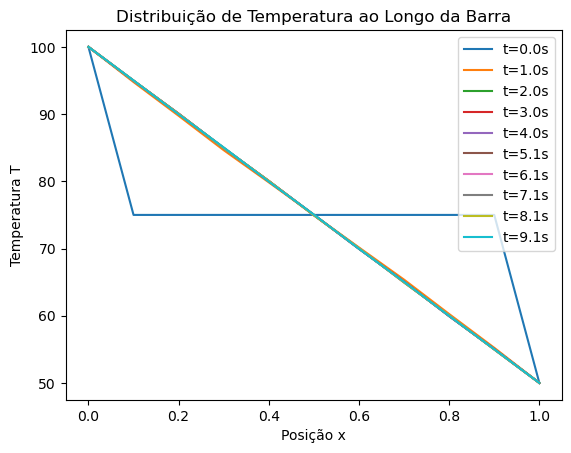

In [5]:
import numpy as np
from scipy.integrate import solve_ivp

# Parâmetros
k = 0.1  # Coeficiente de difusão térmica
N = 10   # Número de pontos espaciais
h = 1 / N
T_begin = 100
T_end = 50
T0 = np.full(N-1, 75)  # Temperatura inicial na barra

# Matriz D^2 para diferenças finitas centralizadas
D2 = (np.diag(-2 * np.ones(N-1)) + np.diag(np.ones(N-2), k=1) + np.diag(np.ones(N-2), k=-1)) / h**2

# Função para o sistema de EDOs
def heat_eq(t, T):
    # BC vector (Boundary Conditions)
    BC = np.zeros(N-1)
    BC[0] = T_begin / h**2
    BC[-1] = T_end / h**2
    
    # EDOs system
    return k * (D2 @ T + BC)

# Resolução da EDO no tempo usando solve_ivp
t_span = (0, 10)  # Intervalo de tempo
sol = solve_ivp(heat_eq, t_span, T0, method='RK45', t_eval=np.linspace(0, 10, 100))

# Plotando os resultados
import matplotlib.pyplot as plt

for i in range(0, len(sol.t), 10):
    plt.plot(np.linspace(0, 1, N+1), [T_begin] + sol.y[:, i].tolist() + [T_end], label=f't={sol.t[i]:.1f}s')

plt.xlabel('Posição x')
plt.ylabel('Temperatura T')
plt.title('Distribuição de Temperatura ao Longo da Barra')
plt.legend()
plt.show()

\section*{Problema 3: Identificação de Sistema Linear (Mínimos Quadrados)}

Observe que a equação de calor da questão anterior, para computar o próximo passo de uma dada temperatura \( T[k] \), pode ser representada da seguinte forma, caso algum tipo de operação de discretização seja efetuada:
\[
T_i[k + 1] = a \cdot T[k] + b \cdot T_{\text{begin}}[k]
\]
com \( T_{\text{begin}}[k] \) definido no item 4 do problema acima. Note que \( T_{\text{begin}}[0] = 60 \) sendo incrementado em 5 unidades a cada 0.2 segundos, e \( a \) um vetor de tamanho \( N(h) \) (veja exercício anterior).

Utilizando os dados obtidos na simulação por método de Runge-Kutta da alternativa 4 do Problema 1, para \( h = 0.2 \), deseja-se obter um modelo na forma da equação (12) de forma data-driven, a fim de identificar a temperatura mais próxima de \( T_{\text{end}} \), a \( T_N \).

Tarefas:
\begin{enumerate}
    \item Implemente o Método de Mínimos Quadrados:
    \[
    \min_{a, b} \sum_{k=0}^{K} \|T_N[k + 1] - (a \cdot T[k] + b \cdot T_{\text{begin}}[k])\|^2
    \]
    Calcule a solução de forma que não precise utilizar a inversa e inclua o método de Cholesky no cálculo da mesma.
    
    \item De acordo com os dados obtidos, monte a matriz de dados de entrada \( X \) e a matriz de dados de saída \( Y \). Sugestão: defina \( Y \) e \( X \) conforme segue:
    \[
    Y = \begin{pmatrix} T_N[1] \\ T_N[2] \\ \vdots \\ T_N[K] \end{pmatrix}, \quad X = \begin{pmatrix} T^T[0] & T_{\text{begin}}[0] \\ T^T[1] & T_{\text{begin}}[1] \\ \vdots & \vdots \\ T^T[K-1] & T_{\text{begin}}[K-1] \end{pmatrix}
    \]
    
    Note que, assim como \( T[k + 1] = A T[k] + B T_{\text{begin}}[k] \), a seguinte relação é válida:
    \[
    Y = X \begin{pmatrix} a \\ b \end{pmatrix}
    \]
    ou seja,
    \[
    Y = X W
    \]
    sendo
    \[
    W = \begin{pmatrix} a \\ b \end{pmatrix}
    \]
    
    \item Execute o algoritmo de resolução de mínimos quadrados para obter a matriz \( W \).
    \item Calcule o resíduo com relação aos dados de saída \( Y \),
    \[
    \|Y - X W\|^2
    \]
    Imprima o resíduo quadrático para \( T_N \).
    \item Extraia o vetor \( a \) e o escalar \( b \) da matriz \( W \) obtida.
\end{enumerate}
\\




\pagebreak


\section*{Problema 4: Minimização de Norma}

Considere o seguinte polinômio de oitavo grau:
\[
y = p(x) = \sum_{i=0}^{8} w_i x^i
\]
Deseja-se que para determinados valores:
\[
3 = p(2)
\]
\[
7 = p(5)
\]
\[
-5 = p(-1)
\]
O objetivo é encontrar valores de \( w \) que façam essas 3 relações valerem, enquanto se minimiza a norma:
\[
\|w\|^2 = \sum_{i=0}^{8} w_i^2
\]

Tarefas:
\begin{enumerate}
    \item Coloque o problema na forma:
    \[
    \min_w \|w\|^2
    \]
    \[
    \text{s.t. } A_{\text{LN}} w = b_{\text{LN}}
    \]
    explicite a forma numérica das matrizes.
    
    \item Resolva o problema de minimização de norma aplicando a solução apresentada na disciplina. Não utilize inversões matriciais em sua solução. Resolva utilizando \( LDL^T \) com ordenação AMD (Approximate Minimum Degree).
    
    \item Resolva novamente o problema, agora por meio do método do gradiente residual.
    
    \item Mostre um gráfico retratando o polinômio e os pontos mencionados.
\end{enumerate}
\\




\pagebreak

\section*{Problema 5: Otimização Não Linear}

Uma empresa de manufatura estipula que o custo médio diário para produzir \( q \) unidades de um dado produto é dado pela seguinte equação:
\[
\bar{C}(q) = \alpha q^2 + \beta q + \frac{\lambda}{q} + c
\]
onde \( \alpha = 0.0001 \), \( \beta = -0.08 \), \( \lambda = 5000 \), e \( c = 65 \).

Tarefas:
\begin{enumerate}
    \item A função \( \bar{C}(q) \) é convexa no domínio \( \mathbb{R}^*_+ \)? Desenvolva uma demonstração formal, qualquer que seja a resposta.
    
    \item Dada a condição inicial \( q_0 = 50 \), utilize o método de Newton para encontrar o número de unidades \( q \) produzidas que minimiza o custo diário médio do produto.
    
    \item Forneça uma tabela com os valores de \( q_k \), \( \bar{C}(q_k) \) nos primeiros 4 passos de Newton \( k = 1, \dots, 4 \).
    
    \item Plote a curva da função \( \bar{C}(q) \) dado \( q \in \{150, 800\} \) e determine o ponto mínimo visualmente para validar a solução obtida pelo método de Newton.
\end{enumerate}
\\





\pagebreak